In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Veri setini yükleyelim

data = pd.read_csv("kufurler_yapay_zeka.csv")




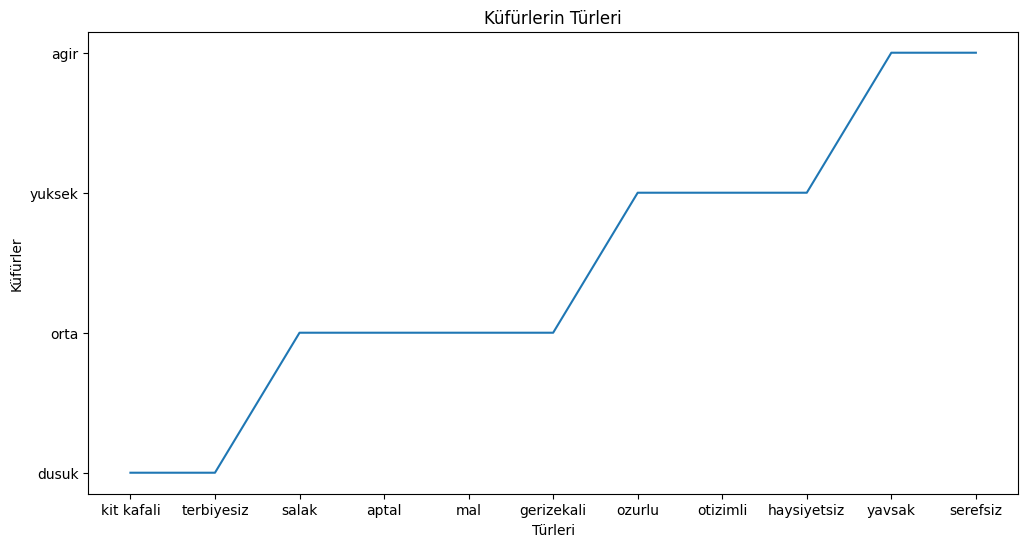

In [6]:
#Grafiğe dökelim

plt.figure(figsize=(12, 6))
plt.plot(data.kufur, data.tur)
plt.xlabel('Türleri')
plt.ylabel('Küfürler')
plt.title('Küfürlerin Türleri')
plt.show()

#Hiçbir yerde bununla ilgili türkçe data set bulamadığım ve kendim yazarken de çok aşırıya kaçmamak amacıyla ağır küfürler yazmadım.

In [7]:
# Kufur ve tur sütunlarını bağımsız ve bağımlı değişken olarak ayıralım
X = data['kufur']
y = data['tur']

"""# Kategorik verileri sayısal forma dönüştürmek için Label Encoding kullanalım
label_encoder = LabelEncoder()

# Kufur sütunundaki string değerleri sayısal forma dönüştürürelim
kufur_to_numeric = {
    'kit kafali': 0,
    'terbiyesiz': 1,
    'salak': 2,
    'aptal': 3,
    'mal': 4,
    'gerizekali': 5,
    'ozurlu': 6,
    'otizimli': 7,
    'haysiyetsiz': 8,
    'yavsak': 9,
    'serefsiz': 10
}
X = X.map(kufur_to_numeric)

y = label_encoder.fit_transform(y)"""

# --> Sonradan bu bölüme gerek olmadığına karar verdim



# Veri setini eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Karar ağacı sınıflandırıcı modelini oluştur
model = DecisionTreeClassifier()

#Yazdıralım
print((X_train))
print((y_train))


10       serefsiz
2           salak
1      terbiyesiz
8     haysiyetsiz
4             mal
7        otizimli
3           aptal
6          ozurlu
Name: kufur, dtype: object
10      agir
2       orta
1      dusuk
8     yuksek
4       orta
7     yuksek
3       orta
6     yuksek
Name: tur, dtype: object


In [8]:
# Modeli eğitelim
model.fit(X_train, y_train)

# Test kümesi üzerinde modeli değerlendirelim
y_pred = model.predict(X_test.reshape(-1, 1))
accuracy = accuracy_score(y_test, y_pred)

print("Test doğruluğu:", accuracy)



ValueError: could not convert string to float: 'serefsiz'

In [ ]:
# Test kümesi üzerinde tahminler yapalaım
y_pred = model.predict(X_test)

# Tahmin edilen kategorilerle gerçek kategorileri bir araya getirelim
results = pd.DataFrame({'kufur': X_test.values.flatten(), 'Gerçek Tür': y_test, 'Tahmin Edilen Tür': y_pred})

# Sonuçları görüntüleyelim
print(results)




In [ ]:
#Sonuç olarak bunun sonucunda bize bu küfürleri kategorilere ayırmasını bekleyeceğiz.